In [1]:
import os
import time
import numpy as np
import asyncio
import threading
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from pynq import Interrupt
from pynq import Clocks
from pynq import GPIO
from pynq import Overlay
from pynq import MMIO
from pynq.lib.video import *

In [2]:
overlay = Overlay('zynq_camera_vdma_lcd.bit')
overlay.ip_dict.keys()

dict_keys(['axi_iic', 'axi_intc_0', 'axi_vdma_1', 'axi_vdma_0', 'axi_vdma_2', 'xil_vip_0', 'xil_vip_1', 'xil_isp_lite_0', 'xil_camif_0'])

In [3]:
print('cpu_mhz', Clocks.cpu_mhz)
print('fclk0_mhz', Clocks.fclk0_mhz)
print('fclk1_mhz', Clocks.fclk1_mhz)
print('fclk2_mhz', Clocks.fclk2_mhz)
print('fclk3_mhz', Clocks.fclk3_mhz)
Clocks.fclk0_mhz = 100.0
print('fclk0_mhz', Clocks.fclk0_mhz)

cpu_mhz 1000.0
fclk0_mhz 83.333333
fclk1_mhz 100.0
fclk2_mhz 100.0
fclk3_mhz 100.0
fclk0_mhz 100.0


In [4]:
ps_led0 = GPIO(GPIO.get_gpio_base() + 7, 'out')
ps_led1 = GPIO(GPIO.get_gpio_base() + 8, 'out')
pl_led0 = GPIO(GPIO.get_gpio_pin(3), 'out')
pl_led1 = GPIO(GPIO.get_gpio_pin(4), 'out')
ps_led0.write(1)
ps_led1.write(1)
pl_led0.write(1)
pl_led1.write(1)

In [5]:
import cffi
OV5640_ADDR = (0x78 >> 1)
_iic = overlay.axi_iic
_ffi = cffi.FFI()
_buffer = _ffi.new("unsigned char [32]")
def _read(reg_addr):
    _buffer[0] = reg_addr >> 8
    _buffer[1] = reg_addr & 0x0FF
    _iic.send(OV5640_ADDR, _buffer, 2, 1)
    _iic.receive(OV5640_ADDR, _buffer, 1)
    _iic.wait()
    # Clear all of the interrupts
    _iic.write(0x20, _iic.read(0x20))
    return _buffer[0]
def _write(reg_addr, data):
    _buffer[0] = reg_addr >> 8
    _buffer[1] = reg_addr & 0x0FF
    _buffer[2] = data
    _iic.send(OV5640_ADDR, _buffer, 3)
    _iic.wait()
    # Clear all of the interrupts
    _iic.write(0x20, _iic.read(0x20))
id = (_read(0x300a) << 8) | _read(0x300b)
if (id == 0x5640) :
    print("OV5640 CMOS Sensor detected")
else :
    print("OV5640 CMOS Sensor not found")
_write(0x3008, 0x82)
time.sleep(0.001)
_write(0x3103, 0x11)
_write(0x3008, 0x82)
_write(0x3008, 0x42)
_write(0x3103, 0x03)
_write(0x3017, 0xff)
_write(0x3018, 0xff)
_write(0x3034, 0x1a)
_write(0x3035,0x11)
_write(0x3036, 0x78)
_write(0x3037, 0x13)
_write(0x3108, 0x01)
_write(0x3630, 0x36)
_write(0x3631, 0x0e)
_write(0x3632, 0xe2)
_write(0x3633, 0x12)
_write(0x3621, 0xe0)
_write(0x3704, 0xa0)
_write(0x3703, 0x5a)
_write(0x3715, 0x78)
_write(0x3717, 0x01)
_write(0x370b, 0x60)
_write(0x3705, 0x1a)
_write(0x3905, 0x02)
_write(0x3906, 0x10)
_write(0x3901, 0x0a)
_write(0x3731, 0x12)
_write(0x3600, 0x08)
_write(0x3601, 0x33)
_write(0x302d, 0x60)
_write(0x3620, 0x52)
_write(0x371b, 0x20)
_write(0x471c, 0x50)
_write(0x3a13, 0x43)
_write(0x3a18, 0x00)
_write(0x3a19, 0xf8)
_write(0x3635, 0x13)
_write(0x3636, 0x03)
_write(0x3634, 0x40)
_write(0x3622, 0x01)
_write(0x3c01, 0x34)
_write(0x3c04, 0x28)
_write(0x3c05, 0x98)
_write(0x3c06, 0x00)
_write(0x3c07, 0x08)
_write(0x3c08, 0x00)
_write(0x3c09, 0x1c)
_write(0x3c0a, 0x9c)
_write(0x3c0b, 0x40)
_write(0x3820, 0x42)
_write(0x3821, 0x01)
_write(0x3800, 0x00)
_write(0x3801, 0x00)
_write(0x3802, 0x00)
_write(0x3803, 0x04)
_write(0x3804, 0x0a)
_write(0x3805, 0x3f)
_write(0x3806, 0x07)
_write(0x3807, 0x9b)
_write(0x3808, 0x05)
_write(0x3809, 0x00)
_write(0x380a, 0x03)
_write(0x380b, 0xc0)
_write(0x380c, 0x08)
_write(0x380d, 0x00)
_write(0x380e, 0x04)
_write(0x380f, 0x00)
_write(0x3810, 0x00)
_write(0x3811, 0x10)
_write(0x3812, 0x00)
_write(0x3813, 0x07)
_write(0x3814, 0x31)
_write(0x3815, 0x31)
_write(0x3618, 0x00)
_write(0x3612, 0x29)
_write(0x3708, 0x64)
_write(0x3709, 0x52)
_write(0x370c, 0x03)
_write(0x3a02, 0x03)
_write(0x3a03, 0xd8)
_write(0x3a08, 0x01)
_write(0x3a09, 0x27)
_write(0x3a0a, 0x00)
_write(0x3a0b, 0xf6)
_write(0x3a0e, 0x03)
_write(0x3a0d, 0x04)
_write(0x3a14, 0x03)
_write(0x3a15, 0xd8)
_write(0x4001, 0x02)
_write(0x4004, 0x02)
_write(0x3000, 0x00)
_write(0x3002, 0x1c)
_write(0x3004, 0xff)
_write(0x3006, 0xc3)
_write(0x300e, 0x58)
_write(0x302e, 0x00)
_write(0x4300, 0xf8)
_write(0x501f, 0x03)
_write(0x4713, 0x03)
_write(0x4407, 0x04)
_write(0x440e, 0x00)
_write(0x460b, 0x37)
_write(0x460c, 0x20)
_write(0x4837, 0x22)
_write(0x3824, 0x02)
_write(0x5000, 0x00)
_write(0x5001, 0x00)
_write(0x3a0f, 0x36)
_write(0x3a10, 0x2e)
_write(0x3a1b, 0x38)
_write(0x3a1e, 0x2c)
_write(0x3a11, 0x70)
_write(0x3a1f, 0x18)
_write(0x3008, 0x02)
_write(0x3400, 0x04)
_write(0x3401, 0x00)
_write(0x3402, 0x04)
_write(0x3403, 0x00)
_write(0x3404, 0x04)
_write(0x3405, 0x00)
_write(0x3406, 0x01)
_write(0x4000, 0x88)
_write(0x3503, 0x03)
exposure = 0xffff
gain = 0x3ff
_write(0x3500, (exposure>>12)&0x0ff)
_write(0x3501, (exposure>>4)&0x0ff)
_write(0x3502, (exposure&0x0f)<<4)
_write(0x350a, (gain>>8)&0x3)
_write(0x350b, gain&0x0ff)
print("=== ov5640_init_96mhz_raw_960p_45fps initialize OK!\n")

s_exposure = 0xffff
def cmos_set_exposure(exposure) :
    global s_exposure
    if s_exposure != exposure :
        _write(0x3500, (exposure>>12)&0x0ff)
        _write(0x3501, (exposure>>4)&0x0ff)
        _write(0x3502, (exposure&0x0f)<<4)
    s_exposure = exposure

s_gain = 0x0ff
def cmos_set_gain(gain) :
    global s_gain
    if s_gain != gain :
        _write(0x350a, (gain>>8)&0x3)
        _write(0x350b, gain&0x0ff)
    s_gain = gain
    
cmos_set_exposure(exposure)
cmos_set_gain(gain)

OV5640 CMOS Sensor detected
=== ov5640_init_96mhz_raw_960p_45fps initialize OK!



In [6]:
CAMIF_REG_RESET              = (0 * 4)
CAMIF_REG_WIDTH              = (1 * 4)
CAMIF_REG_HEIGHT             = (2 * 4)
CAMIF_REG_FRAME_CNT          = (3 * 4)
CAMIF_REG_COLORBAR_EN        = (4 * 4)
CAMIF_REG_INT_STATUS         = (5 * 4)
CAMIF_REG_INT_MASK           = (6 * 4)
camif = overlay.xil_camif_0.mmio
camif.write_reg(CAMIF_REG_RESET, 0)
camif.write_reg(CAMIF_REG_INT_MASK, 0xffff)
camif.write_reg(CAMIF_REG_COLORBAR_EN, 0)
camif.write_reg(CAMIF_REG_RESET, 0)
# camif.write_reg(CAMIF_REG_INT_MASK, ~0x1)

In [7]:
ISP_REG_RESET                 = (0  * 4)
ISP_REG_TOP_EN                = (1  * 4)
ISP_REG_DPC_THRESHOLD         = (2  * 4)
ISP_REG_BLC_R                 = (3  * 4)
ISP_REG_BLC_GR                = (4  * 4)
ISP_REG_BLC_GB                = (5  * 4)
ISP_REG_BLC_B                 = (6  * 4)
ISP_REG_NR_LEVEL              = (7  * 4)
ISP_REG_DGAIN                 = (8  * 4)
ISP_REG_WB_RGAIN              = (9  * 4)
ISP_REG_WB_GGAIN              = (10  * 4)
ISP_REG_WB_BGAIN              = (11  * 4)
ISP_REG_CCM_RR                = (12 * 4)
ISP_REG_CCM_RG                = (13 * 4)
ISP_REG_CCM_RB                = (14 * 4)
ISP_REG_CCM_GR                = (15 * 4)
ISP_REG_CCM_GG                = (16 * 4)
ISP_REG_CCM_GB                = (17 * 4)
ISP_REG_CCM_BR                = (18 * 4)
ISP_REG_CCM_BG                = (19 * 4)
ISP_REG_CCM_BB                = (20 * 4)
ISP_REG_STAT_AE_RECT_X        = (21 * 4)
ISP_REG_STAT_AE_RECT_Y        = (22 * 4)
ISP_REG_STAT_AE_RECT_W        = (23 * 4)
ISP_REG_STAT_AE_RECT_H        = (24 * 4)
ISP_REG_STAT_AE_PIX_CNT       = (25 * 4)
ISP_REG_STAT_AE_SUM           = (26 * 4)
ISP_REG_STAT_AWB_MIN          = (27 * 4)
ISP_REG_STAT_AWB_MAX          = (28 * 4)
ISP_REG_STAT_AWB_PIX_CNT      = (29 * 4)
ISP_REG_STAT_AWB_SUM_R        = (30 * 4)
ISP_REG_STAT_AWB_SUM_G        = (31 * 4)
ISP_REG_STAT_AWB_SUM_B        = (32 * 4)
ISP_REG_INT_STATUS            = (33 * 4)
ISP_REG_INT_MASK              = (34 * 4)
ISP_REG_STAT_AE_HIST_ADDR     = (1*1024*4)
ISP_REG_STAT_AE_HIST_SIZE     = (4*256*4)
ISP_REG_STAT_AWB_HIST_ADDR    = (2*1024*4)
ISP_REG_STAT_AWB_HIST_SIZE    = (3*256*4)
ISP_REG_TOP_EN_BIT_DPC_EN          = (1<<0)
ISP_REG_TOP_EN_BIT_BLC_EN          = (1<<1)
ISP_REG_TOP_EN_BIT_BNR_EN          = (1<<2)
ISP_REG_TOP_EN_BIT_DGAIN_EN        = (1<<3)
ISP_REG_TOP_EN_BIT_DEMOSIC_EN      = (1<<4)
ISP_REG_TOP_EN_BIT_WB_EN           = (1<<5)
ISP_REG_TOP_EN_BIT_CCM_EN          = (1<<6)
ISP_REG_TOP_EN_BIT_CSC_EN          = (1<<7)
ISP_REG_TOP_EN_BIT_GAMMA_EN        = (1<<8)
ISP_REG_TOP_EN_BIT_EE_EN           = (1<<9)
ISP_REG_TOP_EN_BIT_STAT_AE_EN      = (1<<10)
ISP_REG_TOP_EN_BIT_STAT_AWB_EN     = (1<<11)
ISP_REG_INT_STATUS_BIT_FRAME_DONE  = (1<<0)
ISP_REG_INT_STATUS_BIT_AE_DONE     = (1<<1)
ISP_REG_INT_STATUS_BIT_AWB_DONE    = (1<<2)
ISP_REG_INT_MASK_BIT_FRAME_DONE    = (1<<0)
ISP_REG_INT_MASK_BIT_AE_DONE       = (1<<1)
ISP_REG_INT_MASK_BIT_AWB_DONE      = (1<<2)

isp = overlay.xil_isp_lite_0.mmio
isp.write_reg(ISP_REG_RESET, 1)
isp.write_reg(ISP_REG_INT_MASK, 0xffff)
isp_top_en = 0
isp_top_en |= ISP_REG_TOP_EN_BIT_DPC_EN
# isp_top_en |= ISP_REG_TOP_EN_BIT_BLC_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_BNR_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_DGAIN_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_DEMOSIC_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_WB_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_CCM_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_CSC_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_GAMMA_EN
# isp_top_en |= ISP_REG_TOP_EN_BIT_EE_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_STAT_AE_EN
isp_top_en |= ISP_REG_TOP_EN_BIT_STAT_AWB_EN
isp.write_reg(ISP_REG_TOP_EN, isp_top_en)
isp.write_reg(ISP_REG_DPC_THRESHOLD, 20)
isp.write_reg(ISP_REG_NR_LEVEL, 2)
isp.write_reg(ISP_REG_DGAIN, 0x10)
isp.write_reg(ISP_REG_RESET, 0)
# isp.write_reg(ISP_REG_INT_MASK, ~ISP_REG_INT_MASK_BIT_FRAME_DONE)

In [8]:
CAM_WIDTH  = 1280
CAM_HEIGHT = 960
LCD_WIDTH  = 800
LCD_HEIGHT = 480
DVI_WIDTH  = 1280
DVI_HEIGHT = 720

In [9]:
VIP_REG_RESET           = (0 * 4)
VIP_REG_TOP_EN          = (1 * 4)
VIP_REG_HIST_EQU_MIN    = (2 * 4)
VIP_REG_HIST_EQU_MAX    = (3 * 4)
VIP_REG_CROP_X          = (4 * 4)
VIP_REG_CROP_Y          = (5 * 4)
VIP_REG_CROP_W          = (6 * 4)
VIP_REG_CROP_H          = (7 * 4)
VIP_REG_DSCALE_H        = (8 * 4)
VIP_REG_DSCALE_V        = (9 * 4)
VIP_REG_INT_STATUS      = (10 * 4)
VIP_REG_INT_MASK        = (11 * 4)
VIP_REG_TOP_EN_BIT_HIST_EQU_EN    = (1<<0)
VIP_REG_TOP_EN_BIT_SOBEL_EN       = (1<<1)
VIP_REG_TOP_EN_BIT_YUV2RGB_EN     = (1<<2)
VIP_REG_TOP_EN_BIT_CROP_EN        = (1<<3)
VIP_REG_TOP_EN_BIT_DSCALE_EN      = (1<<4)
VIP_REG_INT_STATUS_BIT_FRAME_DONE = (1<<0)
VIP_REG_INT_MASK_BIT_FRAME_DONE   = (1<<0)

vip0 = overlay.xil_vip_0.mmio
vip0.write_reg(VIP_REG_RESET, 1)
vip0.write_reg(VIP_REG_INT_MASK, 0xffff)
vip_top_en = 0
scale_h = CAM_WIDTH // LCD_WIDTH
scale_v = CAM_HEIGHT // LCD_HEIGHT
# vip_top_en |= VIP_REG_TOP_EN_BIT_HIST_EQU_EN
# vip_top_en |= VIP_REG_TOP_EN_BIT_SOBEL_EN
vip_top_en |= VIP_REG_TOP_EN_BIT_YUV2RGB_EN
vip_top_en |= VIP_REG_TOP_EN_BIT_CROP_EN
if (scale_h > 1 and scale_v > 1) :
    vip_top_en |= VIP_REG_TOP_EN_BIT_DSCALE_EN
vip0.write_reg(VIP_REG_TOP_EN, vip_top_en)
if (vip_top_en & VIP_REG_TOP_EN_BIT_DSCALE_EN) :
    scale_val = scale_h if scale_h < scale_v else scale_v
    vip0.write_reg(VIP_REG_CROP_X, (CAM_WIDTH-LCD_WIDTH*scale_val)//2)
    vip0.write_reg(VIP_REG_CROP_Y, (CAM_HEIGHT-LCD_HEIGHT*scale_val)//2)
    vip0.write_reg(VIP_REG_CROP_W, LCD_WIDTH*scale_val)
    vip0.write_reg(VIP_REG_CROP_H, LCD_HEIGHT*scale_val)
    vip0.write_reg(VIP_REG_DSCALE_H, scale_val-1)
    vip0.write_reg(VIP_REG_DSCALE_V, scale_val-1)
else :
    vip0.write_reg(VIP_REG_CROP_X, (CAM_WIDTH-LCD_WIDTH)//2)
    vip0.write_reg(VIP_REG_CROP_Y, (CAM_HEIGHT-LCD_HEIGHT)//2)
    vip0.write_reg(VIP_REG_CROP_W, LCD_WIDTH)
    vip0.write_reg(VIP_REG_CROP_H, LCD_HEIGHT)
vip0.write_reg(VIP_REG_RESET, 0)
# vip0.write_reg(VIP_REG_INT_MASK, ~VIP_REG_INT_MASK_BIT_FRAME_DONE)

vip1 = overlay.xil_vip_1.mmio
vip1.write_reg(VIP_REG_RESET, 1)
vip1.write_reg(VIP_REG_INT_MASK, 0xffff)
vip_top_en = 0
scale_h = CAM_WIDTH // DVI_WIDTH
scale_v = CAM_HEIGHT // DVI_HEIGHT
# vip_top_en |= VIP_REG_TOP_EN_BIT_HIST_EQU_EN
# vip_top_en |= VIP_REG_TOP_EN_BIT_SOBEL_EN
vip_top_en |= VIP_REG_TOP_EN_BIT_YUV2RGB_EN
vip_top_en |= VIP_REG_TOP_EN_BIT_CROP_EN
if (scale_h > 1 and scale_v > 1) :
    vip_top_en |= VIP_REG_TOP_EN_BIT_DSCALE_EN
vip1.write_reg(VIP_REG_TOP_EN, vip_top_en)
if (vip_top_en & VIP_REG_TOP_EN_BIT_DSCALE_EN) :
    scale_val = scale_h if scale_h < scale_v else scale_v
    vip1.write_reg(VIP_REG_CROP_X, (CAM_WIDTH-DVI_WIDTH*scale_val)//2)
    vip1.write_reg(VIP_REG_CROP_Y, (CAM_HEIGHT-DVI_HEIGHT*scale_val)//2)
    vip1.write_reg(VIP_REG_CROP_W, DVI_WIDTH*scale_val)
    vip1.write_reg(VIP_REG_CROP_H, DVI_HEIGHT*scale_val)
    vip1.write_reg(VIP_REG_DSCALE_H, scale_val-1)
    vip1.write_reg(VIP_REG_DSCALE_V, scale_val-1)
else :
    vip1.write_reg(VIP_REG_CROP_X, (CAM_WIDTH-DVI_WIDTH)//2)
    vip1.write_reg(VIP_REG_CROP_Y, (CAM_HEIGHT-DVI_HEIGHT)//2)
    vip1.write_reg(VIP_REG_CROP_W, DVI_WIDTH)
    vip1.write_reg(VIP_REG_CROP_H, DVI_HEIGHT)
vip1.write_reg(VIP_REG_RESET, 0)
# vip1.write_reg(VIP_REG_INT_MASK, ~VIP_REG_INT_MASK_BIT_FRAME_DONE)

In [10]:
mode0 = VideoMode(CAM_WIDTH, CAM_HEIGHT, 8)
vdma0 = overlay.axi_vdma_0
vdma0.readchannel.mode = mode0
vdma0.readchannel.start()
vdma0.writechannel.mode = mode0
vdma0.writechannel.start()
vdma0.writechannel.writeframe(vdma0.readchannel.readframe())
vdma0.readchannel.tie(vdma0.writechannel)

mode1 = VideoMode(LCD_WIDTH, LCD_HEIGHT, 24)
vdma1 = overlay.axi_vdma_1
vdma1.readchannel.mode = mode1
vdma1.readchannel.start()
vdma1.writechannel.mode = mode1
vdma1.writechannel.start()
vdma1.readchannel.tie(vdma1.writechannel)

mode2 = VideoMode(DVI_WIDTH, DVI_HEIGHT, 24)
vdma2 = overlay.axi_vdma_2
vdma2.readchannel.mode = mode2
vdma2.readchannel.start()
vdma2.writechannel.mode = mode2
vdma2.writechannel.start()
vdma2.readchannel.tie(vdma2.writechannel)

In [11]:
count = camif.read_reg(CAMIF_REG_FRAME_CNT)
width = camif.read_reg(CAMIF_REG_WIDTH)
height = camif.read_reg(CAMIF_REG_HEIGHT)
print("CAMIF FrameCount:", count, " Size:", str(width) + " x " + str(height))

CAMIF FrameCount: 739  Size: 1280 x 960


In [18]:
vdma0.readchannel.stop()
vdma0.writechannel.stop()
vdma1.readchannel.stop()
vdma1.writechannel.stop()
vdma2.readchannel.stop()
vdma2.writechannel.stop()

In [440]:
mode0 = VideoMode(CAM_WIDTH, CAM_HEIGHT, 8)
vdma0 = overlay.axi_vdma_0
vdma0.readchannel.mode = mode0
vdma0.readchannel.start()

In [14]:
camif.write_reg(CAMIF_REG_COLORBAR_EN, 0)
isp.write_reg(ISP_REG_DGAIN, 0x10)
isp.write_reg(ISP_REG_WB_RGAIN, 0x12)
isp.write_reg(ISP_REG_WB_GGAIN, 0x10)
isp.write_reg(ISP_REG_WB_BGAIN, 0x16)

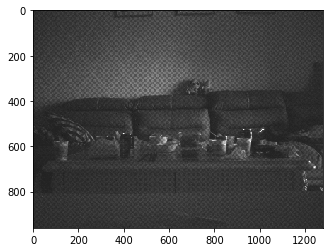

In [12]:
frame = vdma0.readchannel.readframe()
plt.figure("Image")
plt.imshow(frame,cmap='gray')
frame.tofile('raw_1280x960_bggr.bin')
frame.freebuffer()

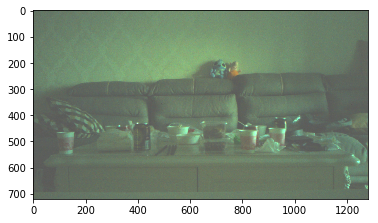

In [11]:
frame = vdma2.readchannel.readframe()
plt.figure("Image")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
frame.tofile('dvi_1280x720_bgr.bin')
frame.freebuffer()

In [34]:
print('vdma0.readchannel.activeframe  =', vdma0.readchannel.activeframe)
print('vdma0.writechannel.activeframe =', vdma0.writechannel.activeframe)
print('vdma1.readchannel.activeframe  =', vdma1.readchannel.activeframe)
print('vdma1.writechannel.activeframe =', vdma1.writechannel.activeframe)

vdma0.readchannel.activeframe  = 2
vdma0.writechannel.activeframe = 1
vdma1.readchannel.activeframe  = 2
vdma1.writechannel.activeframe = 1


In [439]:
vdma0.readchannel.stop()

In [235]:
vdma0.writechannel.start()
vdma0.writechannel.writeframe(vdma0.readchannel.readframe())
vdma0.readchannel.tie(vdma0.writechannel)

In [ ]:
cmos_exposure = 0x080
cmos_gain = 0x010
def isp_ae_handler(target_luminance, max_exposure, max_gain):
    global cmos_exposure, cmos_gain
    target_val = target_luminance
    pix_cnt = isp.read_reg(ISP_REG_STAT_AE_PIX_CNT)
    sum = isp.read_reg(ISP_REG_STAT_AE_SUM)
    gain0 = pix_cnt * target_val // (sum >> 4)
    if gain0 > 20 :
        expo_diff = (((cmos_exposure * gain0) >> 4) - cmos_exposure) >> 1
        expo_diff = expo_diff if expo_diff > 0 else 1
        gain_diff = (((cmos_gain * gain0) >> 4) - cmos_gain) >> 1
        gain_diff = gain_diff if gain_diff > 0 else 1
        if cmos_exposure < max_exposure :
            if cmos_exposure + expo_diff > max_exposure :
                cmos_exposure = max_exposure
            else :
                cmos_exposure = cmos_exposure + expo_diff
        elif cmos_gain < max_gain :
            if cmos_gain + gain_diff > max_gain :
                cmos_gain = max_gain
            else :
                cmos_gain = cmos_gain + gain_diff
        cmos_set_exposure(cmos_exposure)
        cmos_set_gain(cmos_gain)
    elif gain0 < 12 :
        expo_diff = (cmos_exposure - ((cmos_exposure * gain0) >> 4)) >> 1
        expo_diff = expo_diff if expo_diff > 0 else 1
        gain_diff = (cmos_gain - ((cmos_gain * gain0) >> 4)) >> 1
        gain_diff = gain_diff if gain_diff > 0 else 1
        if cmos_gain > 16 :
            if cmos_gain < 16 + gain_diff :
                cmos_gain = 16
            else :
                cmos_gain = cmos_gain - gain_diff
        elif cmos_exposure > 1 :
            if cmos_exposure < 1 + expo_diff :
                cmos_exposure = 1
            else :
                cmos_exposure = cmos_exposure - expo_diff
        cmos_set_exposure(cmos_exposure)
        cmos_set_gain(cmos_gain)

def isp_awb_handler() :
    pix_cnt = isp.read_reg(ISP_REG_STAT_AWB_PIX_CNT)
    sum_r = isp.read_reg(ISP_REG_STAT_AWB_SUM_R)
    sum_g = isp.read_reg(ISP_REG_STAT_AWB_SUM_G)
    sum_b = isp.read_reg(ISP_REG_STAT_AWB_SUM_B)
    r_gain0 = (sum_g << 4) // sum_r
    b_gain0 = (sum_g << 4) // sum_b
    isp.write_reg(ISP_REG_WB_GGAIN, 0x10)
    isp.write_reg(ISP_REG_WB_RGAIN, r_gain0)
    isp.write_reg(ISP_REG_WB_BGAIN, b_gain0)

async def isp_task():
    print("ISP Task Starting")
    intr = overlay.xil_isp_lite_0.irq
    while True:
        await intr.wait()
        status = isp.read_reg(ISP_REG_INT_STATUS)
        isp.write_reg(ISP_REG_INT_STATUS, 0x0)
        if status & ISP_REG_INT_STATUS_BIT_FRAME_DONE :
            isp_ae_handler(65, 0x0ffff, 0x3ff)
            isp_awb_handler()

def isp_thread_func(loop) :
    isp.write_reg(ISP_REG_INT_MASK, ~ISP_REG_INT_MASK_BIT_FRAME_DONE)
    asyncio.set_event_loop(loop)
    asyncio.get_event_loop().run_until_complete(isp_task())

#loop = asyncio.new_event_loop()
#t = threading.Thread(target=isp_thread_func, args=(loop,), daemon=True)
#t.start()
isp.write_reg(ISP_REG_INT_MASK, ~ISP_REG_INT_MASK_BIT_FRAME_DONE)
asyncio.get_event_loop().run_until_complete(isp_task())

ISP Task Starting


In [14]:
isp.write_reg(ISP_REG_INT_MASK, 0)
~ISP_REG_INT_MASK_BIT_FRAME_DONE
overlay.xil_isp_lite_0.irq.wait

-2